# Meteorite Landings

The Meteoritical Society collects data on meteorites that have fallen to Earth from outer space. This dataset includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet.

The dataset was found on NASA's Kaggle profile.
https://www.kaggle.com/datasets/nasa/meteorite-landings

## Data Overview

| Column      | Description |
| ----------- | ----------- |
| name      | the name of the meteorite (typically a location, often modified with a number, year, composition, etc) |
| id   | a unique identifier for the meteorite |
| nametype | either **valid**: a typical meteoritem, or **relict**: a meteorite that has been highly degraded by weather on Earth |
| recclass | the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on [meteorite classification](https://en.wikipedia.org/wiki/Meteorite_classification) for a primer) |
| mass | the mass of the meteorite, in grams |
| fall | whether the meteorite was seen falling, or was discovered after its impact, either **Fell**: the meteorite's fall was observed, or **Found**: the meteorite's fall was not observed |
| year | the year the meteorite fell, or the year it was found (depending on the value of fell) |
| reclat | the latitude of the meteorite's landing |
| reclong | the longitude of the meteorite's landing |
| GeoLocation | a parentheses-enclose, comma-separated tuple that combines reclat and reclong |

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Preview Data

In [2]:
meteors = pd.read_csv('meteorite-landings.csv')
meteors.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
# Check the column data types

meteors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
# The year dtype can be changed from float to int.

meteors['year'] = meteors['year'].dropna().astype(int)

In [5]:
meteors.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [6]:
meteors.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [7]:
meteors['year'].head()

0    1880.0
1    1951.0
2    1952.0
3    1976.0
4    1902.0
Name: year, dtype: float64

In [8]:
# Check minimum years

meteors.sort_values(by='year').head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301.0,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.183330, 12.733330)"


Notice the year 301 and 601. The Kaggle description stated that any date before 860 CE and after 2016 are incorrect—that these are actually BCE years. For our analysis, we will focus on dates between 860 and 2016.

In [9]:
print("Number of meteors before 860:", len(meteors[meteors['year'] < 860]))
print("Number of meteors after 2016:", len(meteors[meteors['year'] > 2016]))

Number of meteors before 860: 2
Number of meteors after 2016: 2


In [10]:
meteors = meteors[(meteors['year'] >= 860) & (meteors['year'] <= 2016)]

In [11]:
len(meteors)

45424

## Data Exploration

To start exploring data, we'll look at the mass, fall, and year features.

### Meteorite Mass

The mass of meteorites are given in grams. We can answer the questions: What is the average mass of meteorites?

In [12]:
# Do some meteors have 0 mass? Yes.

meteors[meteors['mass'].isnull()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.666670, 2.333330)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.466670, -0.550000)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.366670, 2.166670)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.333330, -64.866670)"
172,Castel Berardenga,5292,Valid,Stone-uncl,NaN,Fell,1791.0,43.35000,11.50000,"(43.350000, 11.500000)"
...,...,...,...,...,...,...,...,...,...,...
38275,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,1931.0,NaN,NaN,NaN
38276,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,1931.0,NaN,NaN,NaN
38278,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,1978.0,35.26667,104.31667,"(35.266670, 104.316670)"
41460,Yamato 792768,28117,Valid,CM2,NaN,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"


In [29]:
# So we can take the average mass of only those meteorites that have mass.

mass = meteors[meteors['mass'].notnull()]['mass'].mean()
print("The average meteor mass is:")
print("{:.2f} grams, or".format(mass))
print("{:.2f} kilograms, or".format(mass/1000))
print("{:.2f} pounds".format(mass/1000*2.20462))

The average meteor mass is:
13315.26 grams, or
13.32 kilograms, or
29.36 pounds


In [66]:
# How many meteors are over 20 tons?

len(meteors[meteors['mass'] > 20000000])

10

In [67]:
# What if we remove the 10 largest meteorites and recalculate the average mass?

print("After removing the 10 largest meteors...")

mass = meteors[(meteors['mass'].notnull()) & (meteors['mass'] < 20000000)]['mass'].mean()
print("The average meteor mass is:")
print("{:.2f} grams, or".format(mass))
print("{:.2f} kilograms, or".format(mass/1000))
print("{:.2f} pounds".format(mass/1000*2.20462))

After removing the 10 largest meteors...
The average meteor mass is:
5691.10 grams, or
5.69 kilograms, or
12.55 pounds


In [60]:
# What was the largest and smallest meteorite found?

largest = meteors.sort_values(by='mass', ascending=False).head(1)
l_name = largest['name'].iat[0]
l_mass = largest['mass'].iat[0] / 1000

print()
print("The largest meteor was named {} and had a mass of {:,.0f} kilograms.".format(l_name, l_mass))
print()

smallest = meteors[meteors['mass'] > 0].sort_values(by='mass', ascending=True).head(1)
s_name = smallest['name'].iat[0]
s_mass = smallest['mass'].iat[0]

print("The smallest meteor was named {} and had a mass of {} grams.".format(s_name, s_mass))
print()


The largest meteor was named Hoba and had a mass of 60,000 kilograms.

The smallest meteor was named Yamato 8333 and had a mass of 0.01 grams.



### Meteorite Seen Falling or Was Found?

Found    44317
Fell      1107
Name: fall, dtype: int64


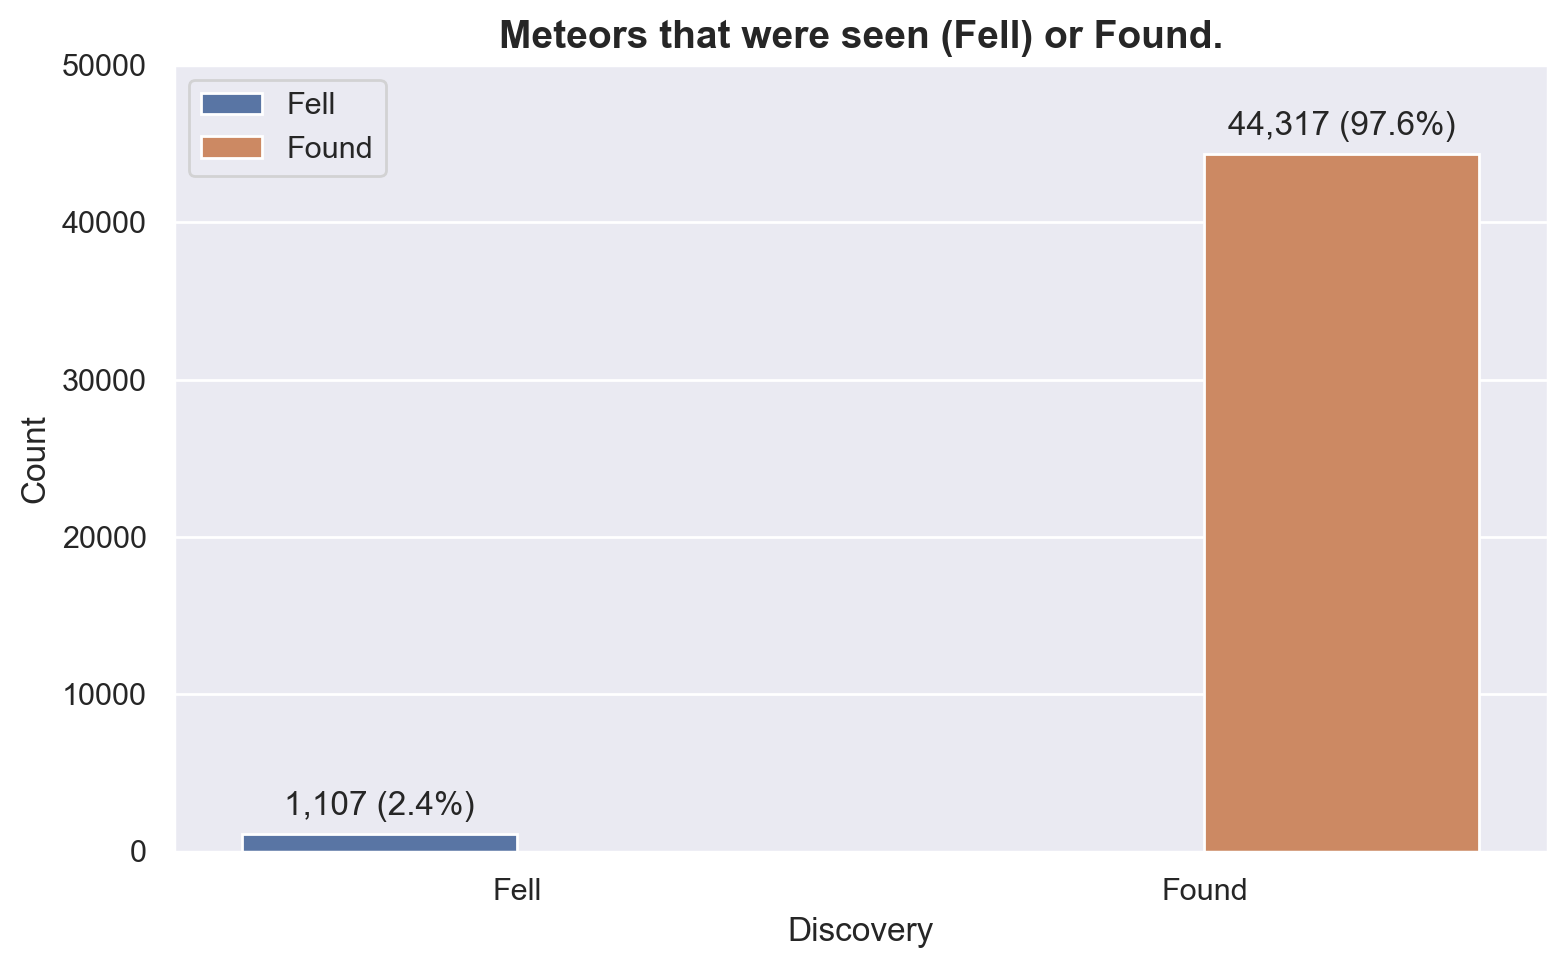

In [195]:
print(meteors['fall'].value_counts())

plt.figure(figsize=(8,5), dpi=200)
ax = sns.countplot(x='fall', data=meteors, hue='fall')
ax.set_title('Meteors that were seen (Fell) or Found.', fontsize=14, fontweight='bold')
ax.set_xlabel('Discovery', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
for p in ax.patches:
    percentage = '{:,.0f} ({:.1f}%)'.format(p.get_height(), 100 * p.get_height()/len(meteors))
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 1200
    ax.annotate(percentage, (x, y), ha='center')
plt.ylim(0,50000)
plt.legend()
plt.tight_layout()
plt.show()

### Meteorites by Year

We can determine how many meteorites have been reported by year. Maybe not that informative but curious to see.

**Meteorites logged by year:**

In [135]:
by_year = meteors['year'].value_counts()

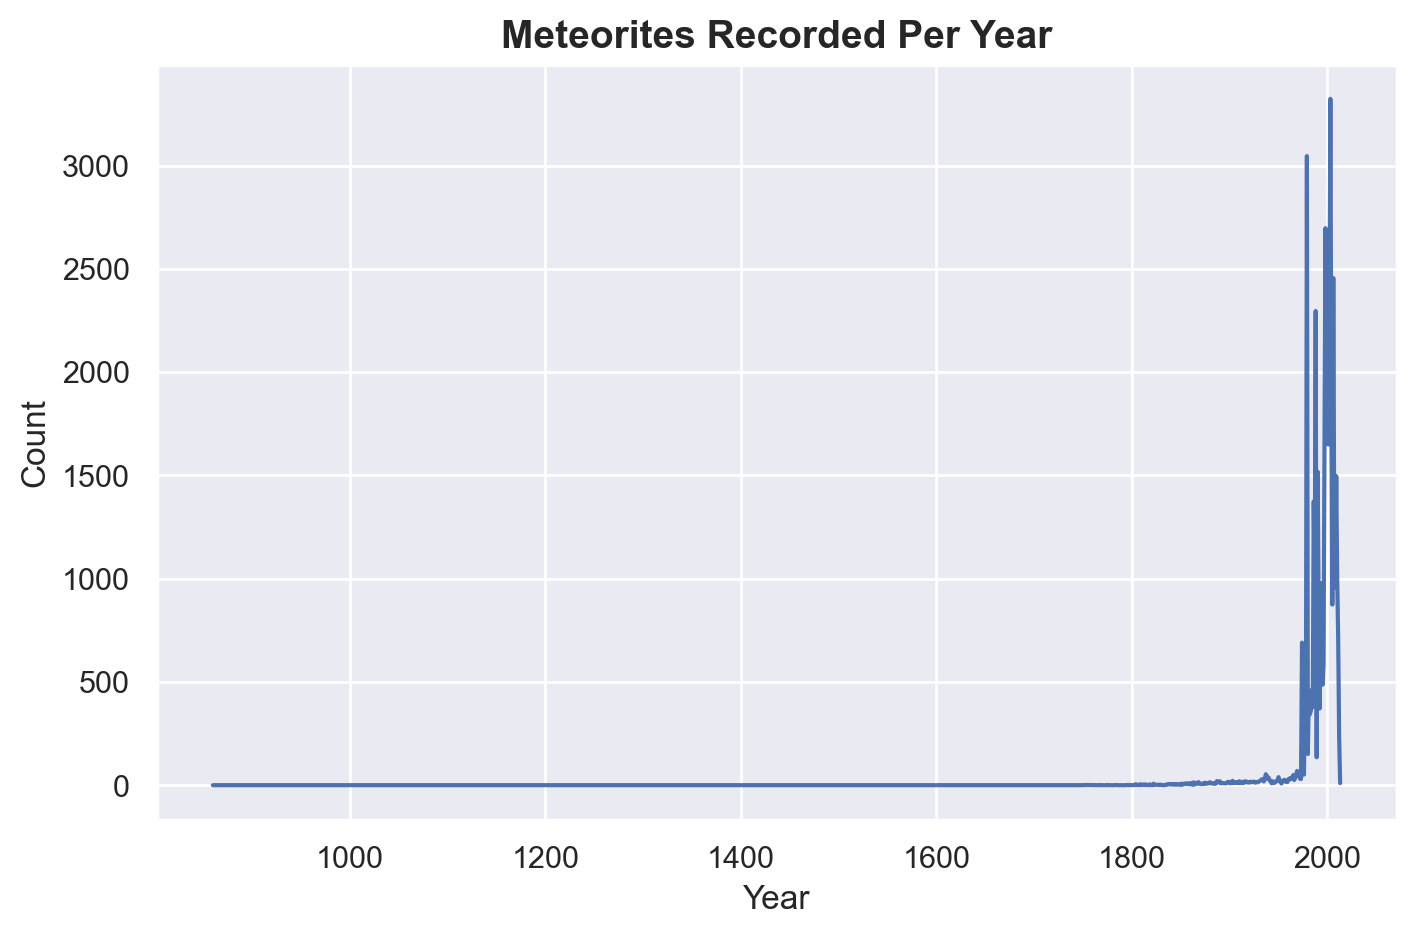

In [136]:
plt.figure(figsize=(8,5), dpi=200)
ax = sns.lineplot(data=by_year)
ax.set_title('Meteorites Recorded Per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

Very few meteorites were recorded before the Space Age. So let's redo plot with 1950 has the starting date.

In [139]:
by_year = meteors[meteors['year'] >= 1950]['year'].value_counts()

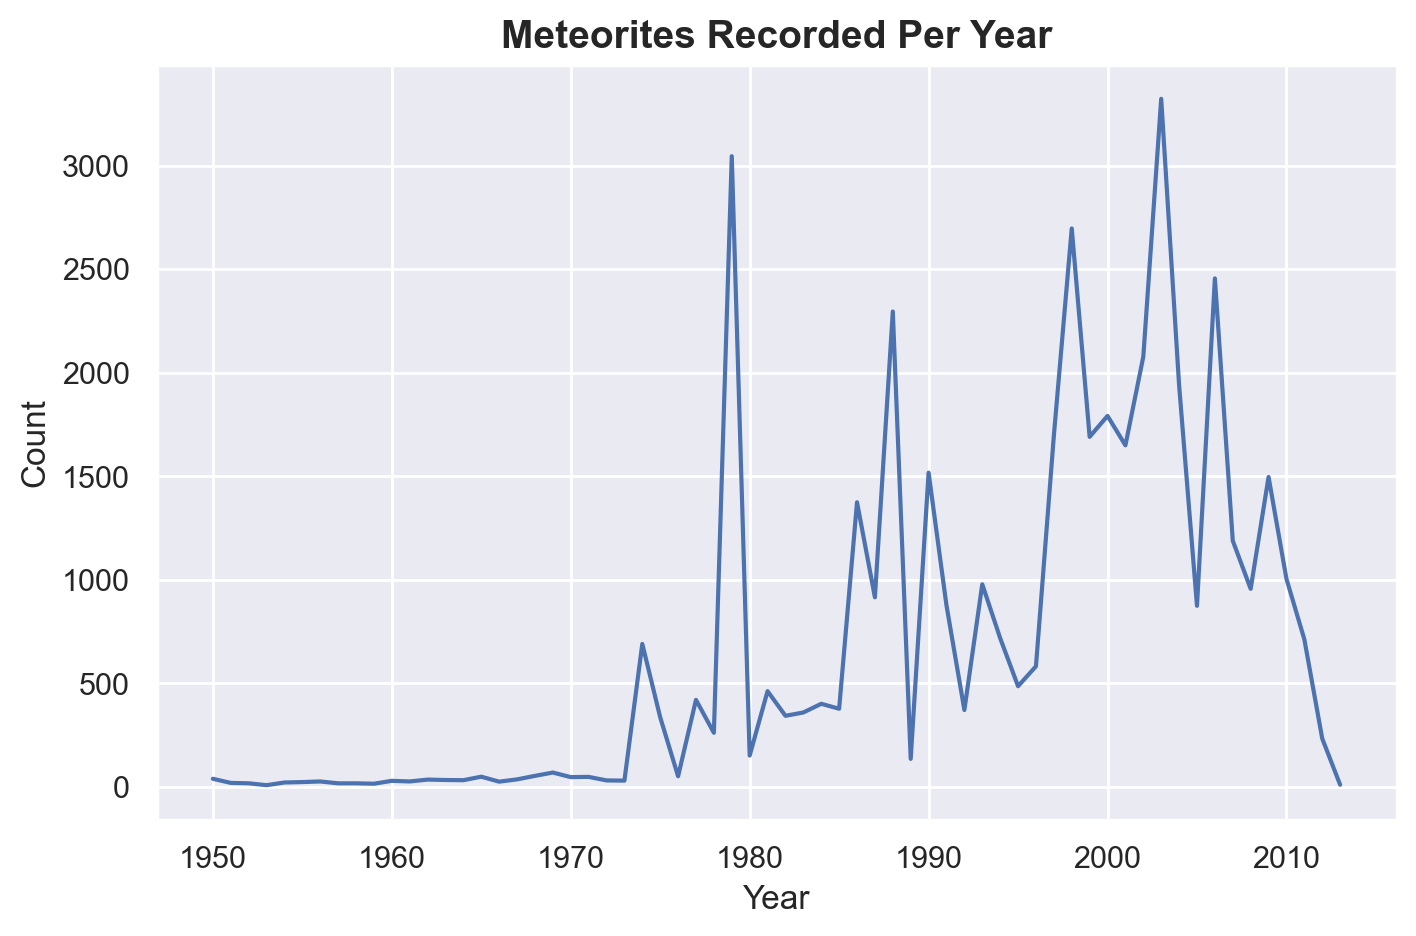

In [140]:
plt.figure(figsize=(8,5), dpi=200)
ax = sns.lineplot(data=by_year)
ax.set_title('Meteorites Recorded Per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

## Meteor Classification

The "recclass" column contains a large number of classes based on physical, chemical and other characteristics that identify the meteorite as a certain type, which can describe where they come. Some terrestrial meteorites have Martian origins! 

In [243]:
meteors['recclass'].unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'L4', 'Aubrite',
       'Iron, IIAB', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'CO3.5', 'Lodran

In [239]:
print("The meteor dataset includes", len(meteors[meteors['recclass'] != 'Unknown']['recclass'].unique()), "different meteor classes.")

The meteor dataset includes 461 different meteor classes.


In [241]:
# Is there a trend for the different meteorite classes?

m_change = meteors.groupby('recclass')['year'].apply(lambda x: x.pct_change().mean()).reset_index(name='avg_change').fillna(0)
m_change['trend'] = np.where(gp['avg_change'] < 0, 'decreasing', np.where(gp['avg_change'] > 0, 'increasing', 'no change'))
m_change.sort_values('avg_change', ascending=False)

,recclass,avg_change,trend
407,Martian (chassignite),0.101928,increasing
193,H?,0.077050,increasing
237,K3,0.051852,increasing
219,"Iron, IID-an",0.050314,increasing
411,Mesosiderite-A,0.033281,increasing
...,...,...,...
393,Lunar (bas/anor),-0.013951,decreasing
212,"Iron, IAB?",-0.014481,decreasing
113,H(5?),-0.015992,decreasing
420,Mesosiderite-B4,-0.025225,decreasing


In [231]:
# How many meteorites have come from Mars?

print(len(meteors.loc[meteors['recclass'].str.contains("martian", case=False)]), 
      "meteorites in the dataset have come from Mars.")

118 meteorites in the dataset have come from Mars.


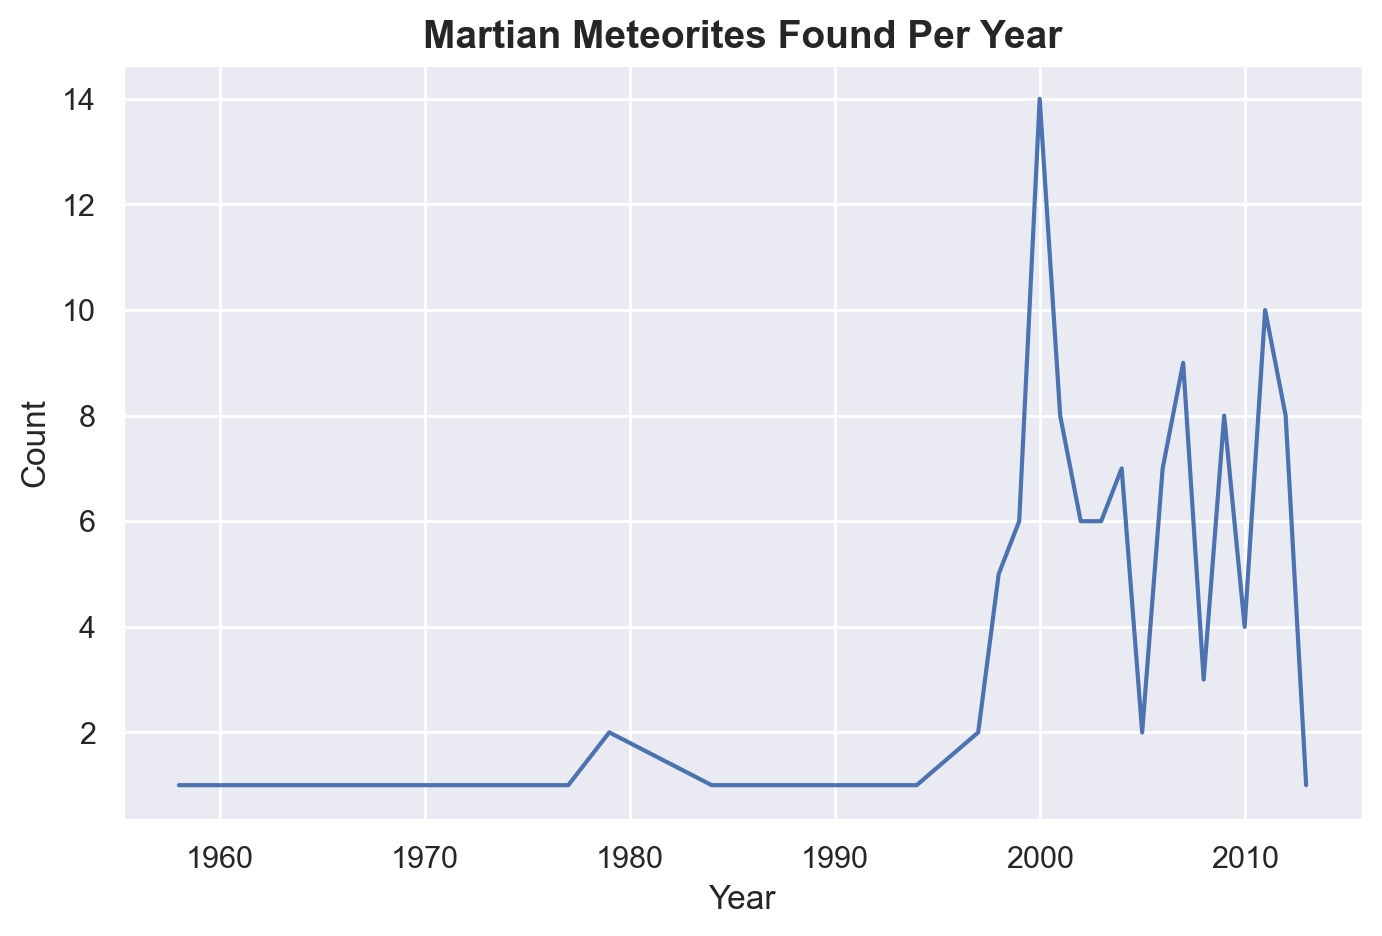

In [233]:
# Are Martian meteorites being found more frequently?

martian = meteors.loc[meteors['recclass'].str.contains("martian", case=False)]
martian_by_year = martian[martian['year'] >= 1950]['year'].value_counts()

plt.figure(figsize=(8,5), dpi=200)
ax = sns.lineplot(data=martian_by_year)
ax.set_title('Martian Meteorites Found Per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

It appears that the late 1990s separates times when Martian meteorites started being found and a time when very few were found.

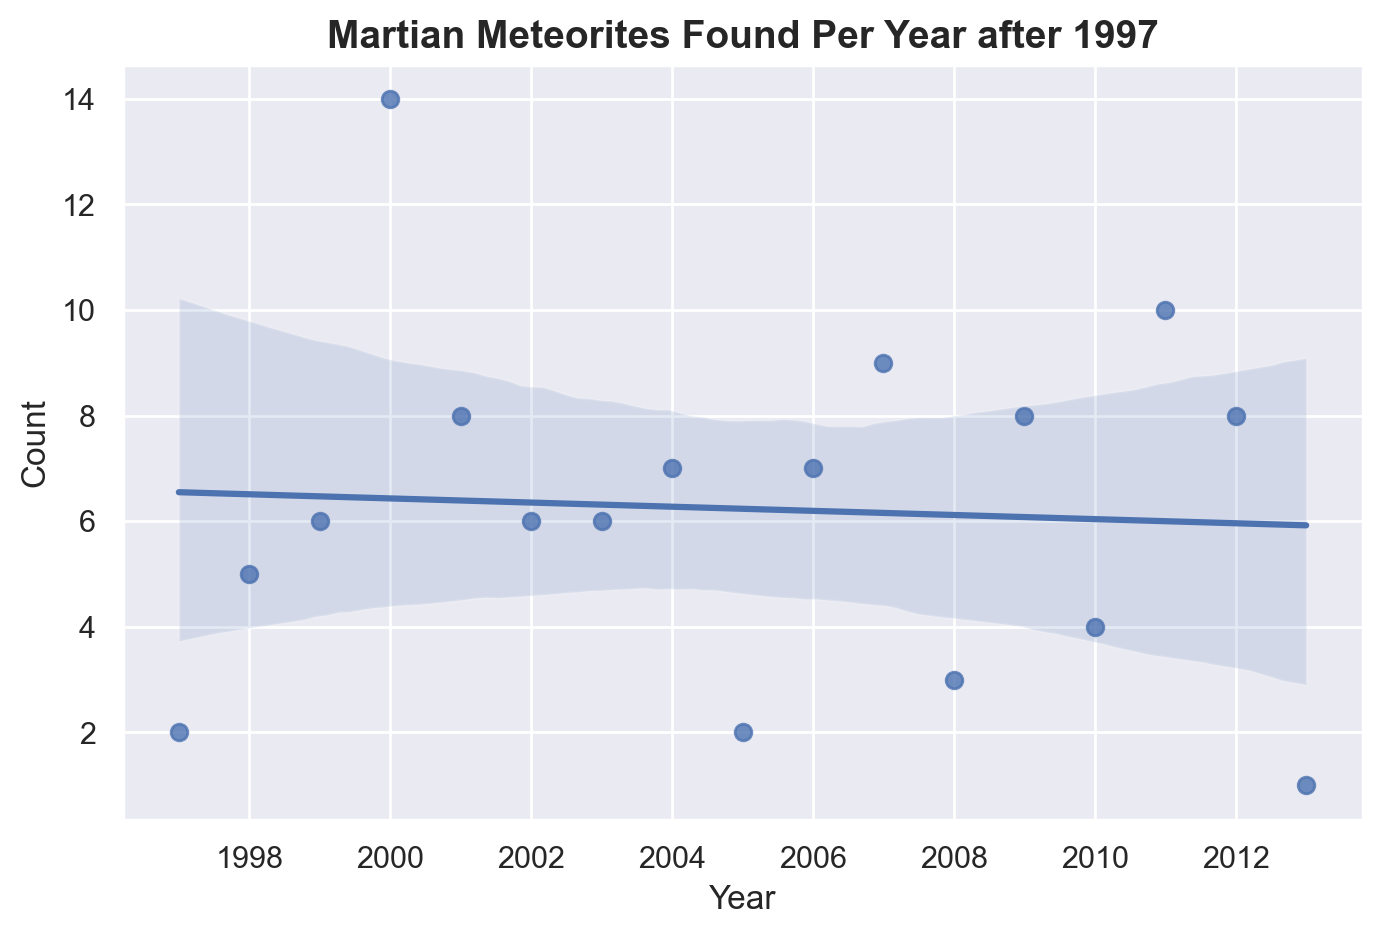

In [261]:
martian = meteors.loc[meteors['recclass'].str.contains("martian", case=False)]
martian_by_year = martian[martian['year'] >= 1997]['year'].value_counts()

plt.figure(figsize=(8,5), dpi=200)
ax = sns.regplot(data=martian_by_year, x=martian_by_year.index, y=martian_by_year.values)
ax.set_title('Martian Meteorites Found Per Year after 1997', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

As for Martian meteors, the trend is relatively flat overall after 1997.